In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import nibabel as nb
import os
import pickle

from multiplot import feature_plot

font = {'weight' : 'bold',
        'size'   : 18}

import matplotlib
matplotlib.rc('font', **font)

In [11]:
"""
8
"""
files = list(('../../data/images/KKI2009_b0_pdfs.pkl', '../../data/images/MRN114_b0_pdfs.pkl',
              '../../data/images/MRN1313_b0_pdfs.pkl', '../../data/images/SWU4_b0_pdfs.pkl', 
              '../../data/images/BNU1_b0_pdfs.pkl', '../../data/images/BNU3_b0_pdfs.pkl',
              '../../data/images/NKI1_b0_pdfs.pkl','../../data/images/NKIENH_b0_pdfs.pkl' 
              ))
names = list(('KKI2009', 'MRN114', 'MRN1313', 'SWU4', 'BNU1', 'BNU3', 'NKI1', 'NKIENH'))

figtitle = 'Image Histograms for B0 Volumes'
fig_outfile = '../../figs/images/multi_b0s_colourful.png'
ylab = 'Density'
xlab = 'Voxel Intensity'
cols = ['#000000','#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628','#f781bf']

In [14]:
def factors(N): 
    return set([item for subitem in 
                [(i, N//i) for i in range(1, int(N**0.5) + 1) if N % i == 0 and i > 1]
                 for item in subitem])

def plotme():
    eps = 1e-9/2
    N = len(names)
    ds = list()
    count = 0
    while len(ds) == 0:
        ds = list(factors(N+count))
        count += 1

    if len(ds) == 1:
        ds = list((ds[0], ds[0]))
    fig = plt.figure(figsize=(4*ds[-1], 4*ds[0]))
    bl = ds[-1]*(ds[0]-1)

    """
    Actually plot things
    """
    for idx, sset in enumerate(names):
        ax = plt.subplot(ds[0], ds[-1], idx+1)
        plt.hold(True)
        f = open(files[idx])
        data = pickle.load(f)
        for subj in data['pdfs'].keys():
            dens = data['pdfs'][subj]
            x = data['xs']
            plt.plot(x, dens+eps, color=cols[idx], alpha=0.07)

        plt.title(sset)
        plt.xscale('log')
        plt.yscale('log')
        
        plt.locator_params(axis='y', numticks=2)
        plt.locator_params(axis='x', numticks=2)

        
        if idx == bl:
            plt.ylabel(ylab)
            plt.xlabel(xlab)

    plt.tight_layout()

    if figtitle is not None:
        my_suptitle = plt.suptitle(figtitle, y = 1.04, size=20)
    else:
        my_suptitle = plt.suptitle("", y = 1.04, size=20)

    if fig_outfile is not None:
        plt.savefig(fig_outfile, bbox_inches='tight',bbox_extra_artists=[my_suptitle])
    plt.show()

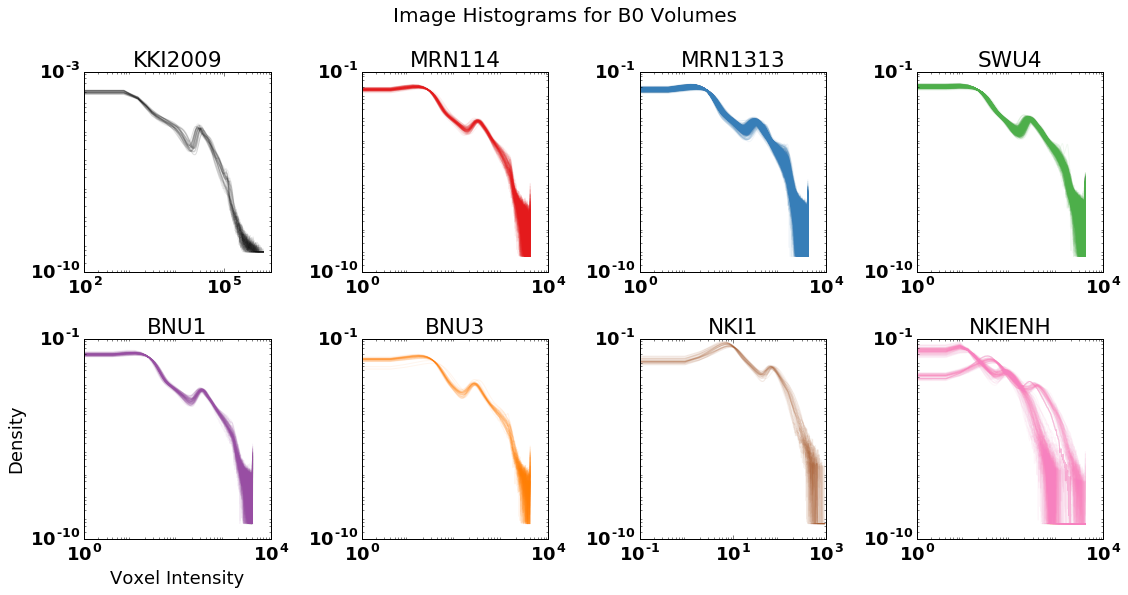

In [15]:
plotme()